#### Context    
> A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?    
> If this help you studying or working, please don´t forget to upvote :). Reference to Joni Hoppen and Aquarela Advanced Analytics Aquarela    
>     
> Greetings!    
>     
#### Content    
> 110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, if you have doubts, just let me know!    
>     
> scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Família    
>     
> 14 variables    
>     
#### Data Dictionary    
> 01 - PatientId    
> Identification of a patient    
> 02 - AppointmentID    
> Identification of each appointment    
> 03 - Gender    
> Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.    
> 04 - ScheduledDay    
> The day of the actuall appointment, when they have to visit the doctor.    
> 05 - AppointmentDay   
> The day someone called or registered the appointment, this is before appointment of course.    
> 06 - Age    
> How old is the patient.    
> 07 - Neighbourhood    
> Where the appointment takes place.    
> 08 - Scholarship    
> True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Família    
> 09 - Hipertension    
> True or False    
> 10 - Diabetes    
> True or False    
> Alcoholism    
> True or False    
> Handcap    
> True or False    
> SMS_received    
> 1 or more messages sent to the patient.    
> No-show    
> True or False.    
> Inspiration    
> What if that possible to predict someone to no-show an appointment?    


In [275]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio

import scipy.stats as stats
from statistics import mean 
from scipy.stats.mstats import winsorize
import warnings


warnings.filterwarnings('ignore')
df = pd.read_csv('data/KaggleV2-May-2016.csv',  low_memory=False)

title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 15 }


In [276]:
df.sort_values(by=['Age'])


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No
34218,3.469431e+12,5649465,F,2016-05-03T06:57:26Z,2016-05-09T00:00:00Z,0,REDENÇÃO,0,0,0,0,0,0,Yes
102834,4.882675e+10,5659726,F,2016-05-04T14:35:59Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,1,No
102832,9.726846e+12,5749887,F,2016-05-31T08:19:38Z,2016-06-01T00:00:00Z,0,MARUÍPE,0,0,0,0,0,0,No
102830,2.845290e+13,5664173,M,2016-05-05T11:24:09Z,2016-06-08T00:00:00Z,0,SÃO CRISTÓVÃO,0,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes


#### We found -1 data in the year row. we delete this

In [277]:
df=df[df['Age']>=0]

#### Null data checked

In [278]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


#### we are looking at categorical variables

In [280]:
df.nunique() 

PatientId          62298
AppointmentID     110526
Gender                 2
ScheduledDay      103548
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [281]:
df.describe(include=['O'])

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110526,110526,110526,110526,110526
unique,2,103548,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71839,24,4691,7717,88207


In [282]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [283]:
print(df['AppointmentDay'].max()) 
print(df['AppointmentDay'].min())

2016-06-08T00:00:00Z
2016-04-29T00:00:00Z


In [284]:
##df2=df.drop_duplicates(subset=["PatientId","AppointmentDay"], keep='first', inplace=False, ignore_index=False)

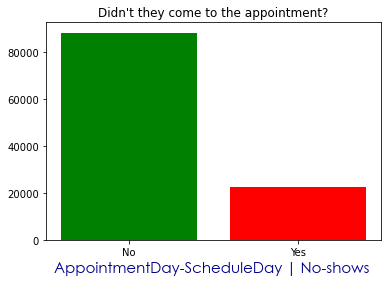

In [285]:


plt.bar(df["No-show"].value_counts().index, df["No-show"].value_counts(),
        color=["green","red"]),
plt.title("Didn't they come to the appointment?")
plt.xlabel('AppointmentDay-ScheduleDay | No-shows ',fontdict = axis_style)

plt.show()

#df['No-show'][df['No-show']=='Yes'].count()

#### Let's calculate the percentage of women and men attending the appointment

In [286]:
totalf=df.groupby("Gender")["Gender"].count()[0]
totalm=df.groupby("Gender")["Gender"].count()[1]
yesf=df[df['No-show']=='Yes'].groupby("Gender")["Gender"].count()[0]
yesm=df[df['No-show']=='Yes'].groupby("Gender")["Gender"].count()[1]

yespercentagef=yesf/totalf
yespercentagem=yesm/totalm

#nof=df[df['No-show']=='No'].groupby("Gender")["Gender"].count()[0]
#nom=df[df['No-show']=='No'].groupby("Gender")["Gender"].count()[1]
#nopercentagef=nof/totalf
#nopercentagem=nom/totalm


#### Percentage of man and women attending the appointment

In [287]:
print("Percentage of women attending the appointment")
print(yespercentagef)

print("Percentage of men attending the appointment")
print(yespercentagem)


Percentage of women attending the appointment
0.20314870752655242
Percentage of men attending the appointment
0.19967947889471915


In [288]:
df['AppointmentDay']=pd.to_datetime(df["AppointmentDay"])
df['ScheduledDay']=pd.to_datetime(df["ScheduledDay"])



In [289]:
df.ScheduledDay.dt.day_name()

0            Friday
1            Friday
2            Friday
3            Friday
4            Friday
            ...    
110522      Tuesday
110523      Tuesday
110524    Wednesday
110525    Wednesday
110526    Wednesday
Name: ScheduledDay, Length: 110526, dtype: object

In [290]:
(df.AppointmentDay)-(df.ScheduledDay)

0        -1 days +05:21:52
1        -1 days +07:51:33
2        -1 days +07:40:56
3        -1 days +06:30:29
4        -1 days +07:52:37
                ...       
110522    34 days 14:44:25
110523    34 days 16:32:27
110524    40 days 07:56:08
110525    40 days 08:50:37
110526    40 days 10:29:04
Length: 110526, dtype: timedelta64[ns]

#### No-show= Yes appointments   (AppointmentDay-ScheduleDay)

In [291]:
noshowyes=df[df['No-show']=="Yes"]

noshowy=(noshowyes.AppointmentDay-noshowyes.ScheduledDay).dt.days


In [292]:
noshowno=df[df['No-show']=="No"]

noshown=(noshowno.AppointmentDay-noshowno.ScheduledDay).dt.days


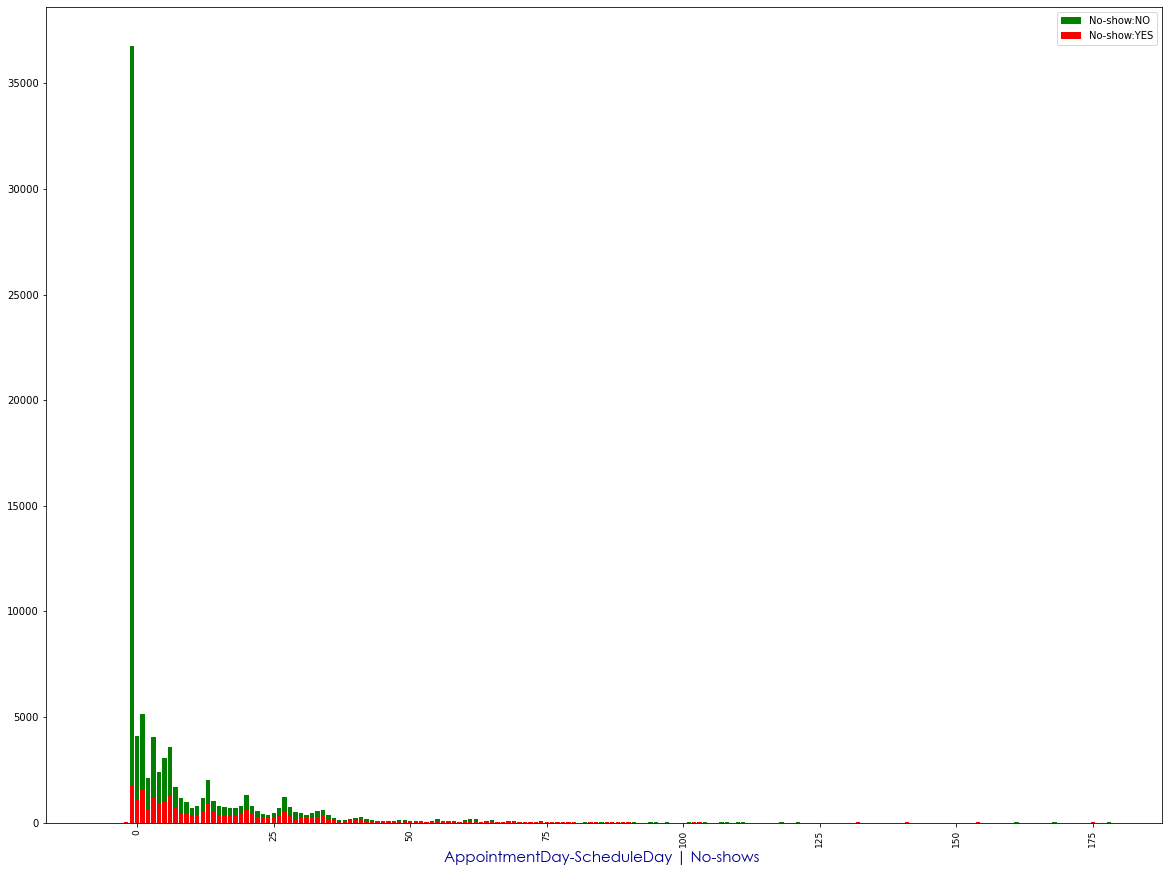

In [293]:
plt.figure(figsize=(20, 15))



plt.subplot(1,1,1)
plt.bar(nodays.value_counts().index,nodays.value_counts(), color = "GREEN",label = 'No-show:NO')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('AppointmentDay-ScheduleDay | No-show:NO ',fontdict = axis_style)

plt.subplot(1,1,1)
plt.bar(yesdays.value_counts().index,yesdays.value_counts(), color = "RED",label = 'No-show:YES')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('AppointmentDay-ScheduleDay | No-shows ',fontdict = axis_style)

plt.legend()
plt.show()

In [309]:
plt.figure(figsize=(20, 15))
dayrate=noshown.value_counts()/noshowy.value_counts()
import plotly.express as px

fig = px.bar(data_frame=dayrate, 
             x=dayrate.index, 
             y=dayrate.values,title="How many days ago did the customer who came to the hospital get an appointment?",
                 labels={"index": "How many days ago the appointment took",  
                         "y": "rate of coming to appointment"})

fig.show()


<Figure size 1440x1080 with 0 Axes>

In [ ]:
##df2=df.drop_duplicates(subset=["PatientId","AppointmentDay"], keep='first', inplace=False, ignore_index=False)

#### The proportion of those who have more than one appointment on the same date

In [421]:
patientdf=df.groupby("PatientId")["AppointmentDay"].count()
patientdf2=patientdf[patientdf>1]
merge=pd.merge(df, patientdf2, left_on= ['PatientId'], right_on= ['PatientId'],how="inner")

In [423]:
merge[merge["No-show"]=="No"]['No-show'].count()/merge[merge["No-show"]=="Yes"]['No-show'].count()

3.776462074863496

#### The proportion of those who have a single appointment on the same date

In [424]:
patientdf3=patientdf[patientdf<2]
merge2=pd.merge(df, patientdf3, left_on= ['PatientId'], right_on= ['PatientId'],how="inner")

In [434]:
(merge2[merge2["No-show"]=="No"]['No-show'].count())/(merge2[merge2["No-show"]=="Yes"]['No-show'].count())

4.327198651306547

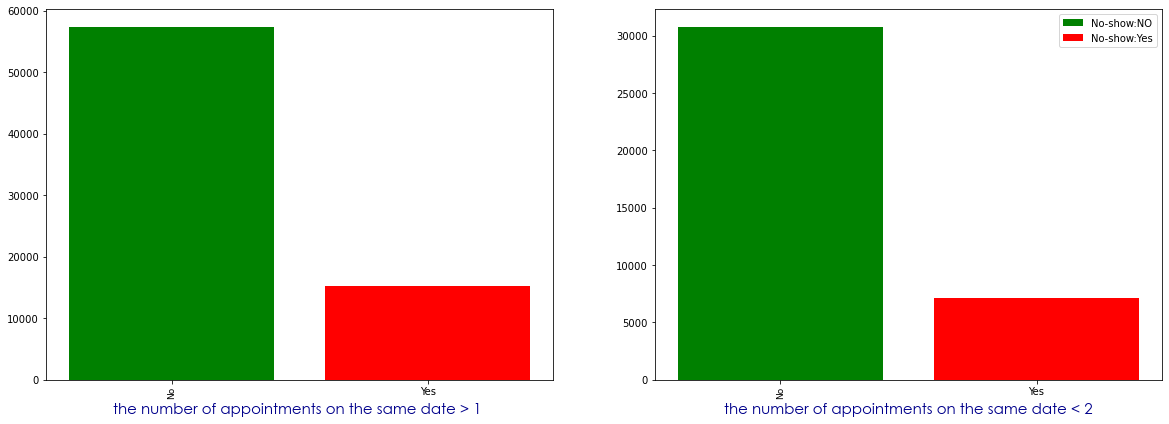

In [433]:

plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.bar("No",merge[merge["No-show"]=="No"]['No-show'].count(), color = "GREEN",label = 'No-show:NO')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('the number of appointments on the same date > 1 ',fontdict = axis_style)

plt.subplot(2,2,1)
plt.bar("Yes",merge[merge["No-show"]=="Yes"]['No-show'].count(), color = "RED",label = 'No-show:Yes')


plt.subplot(2,2,2)
plt.bar("No",merge2[merge2["No-show"]=="No"]['No-show'].count(), color = "GREEN",label = 'No-show:NO')
plt.xticks(rotation = 90, fontsize = 9)
plt.xlabel('the number of appointments on the same date < 2',fontdict = axis_style)

plt.subplot(2,2,2)
plt.bar("Yes",merge2[merge2["No-show"]=="Yes"]['No-show'].count(), color = "RED",label = 'No-show:Yes')


plt.legend()
plt.show()